### Add libraries

In [2]:
import numpy as np
import pandas as  pd
from tqdm import tqdm

from preprocess import data_clean


### Load project files

In [15]:
comments_df = pd.read_csv('data/digikala-comments.csv')
products_df = pd.read_csv('data/digikala-products.csv')


/tmp/ipykernel_41781/95355042.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  products_df = pd.read_csv('data/digikala-products.csv')


In [4]:
# view length of the comments distribution
import matplotlib.pyplot as plt
comments_df = comments_df.dropna(subset=['body'])


In [5]:
comments_df['len'] = comments_df['body'].apply(lambda x: len(x.split()))

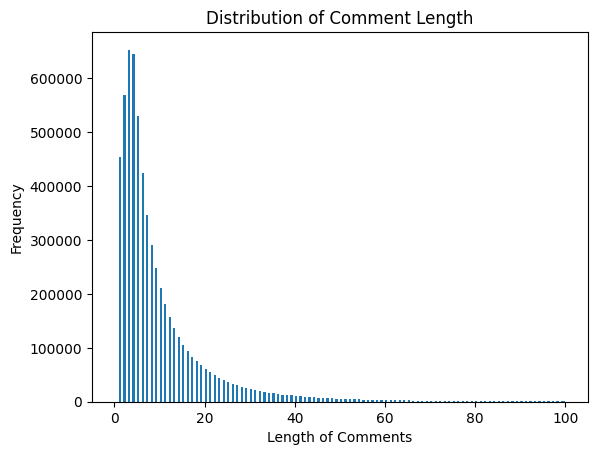

In [7]:
import matplotlib.pyplot as plt

# Set the number of bins
num_bins =200

# Plot the histogram
plt.hist(comments_df['len'], bins=num_bins, range=(0, 100))

# Add labels and title
plt.xlabel('Length of Comments')
plt.ylabel('Frequency')
plt.title('Distribution of Comment Length')

# Show the plot
plt.show()


In [8]:
# Select the first 20,000 comments and save as a tiny workable file
# comments_df = comments_df[:20000]
# comments_df.to_csv('data/digikala-comments-tiny.csv', index=False)



## Cleaning the data
### Working with comments

Note:
 -  rate field should be between 0 to 5

In [16]:
df = comments_df
df[df['rate'] >  6]

,id,title,body,created_at,rate,recommendation_status,is_buyer,product_id,advantages,disadvantages,likes,dislikes,seller_title,seller_code,true_to_size_rate
4369260,38631814,زیبا,کوچک و با کیفیت,9 شهریور 1401,2500.0,recommended,True,5095301,NaN,NaN,0,0,مستر راد,A4Z54,NaN


### TODO: Removing useless columns

## Preproccesing

In [17]:
# Load the data sample, first 20k rows in this case.
corpus = pd.read_csv('data/digikala-comments-tiny.csv')


## Processing
# drop when body is not string
corpus = corpus.dropna(subset=['body'])

tqdm.pandas()

corpus['Cleaned'] = corpus[:1000]['body'].progress_apply(data_clean.preprocess)


100%|██████████| 1000/1000 [00:23<00:00, 42.15it/s]


In [18]:
corpus.head(3)


,id,title,body,created_at,rate,recommendation_status,is_buyer,product_id,advantages,disadvantages,likes,dislikes,seller_title,seller_code,true_to_size_rate,len,Cleaned
0,53672599,پیشنهاد نمیشود,به درد نمیخوره,23 شهریور 1402,1.0,not_recommended,True,252058,NaN,NaN,0,0,دیجی‌کالا,5A52N,NaN,3,به درد نمیخوره
1,9897229,بسته بندی بد,می‌تونست به عنوان یه کالای فرهنگی بهتر بسته بن...,16 تیر 1399,0.0,recommended,True,252058,['تجربه جالبی بود برام '],['بسته بندی جالبی نداشت'],1,0,دیجی‌کالا,5A52N,NaN,10,می‌تونست به عنوان یه کالای فرهنگی بهتر بسته بن...
2,38074516,برس ریمل,بسته بندیش خوب بود\r\n کاربرد و کیفیتشم خیلی خ...,26 مرداد 1401,0.0,recommended,True,3331597,NaN,NaN,0,0,آرالیا بیوتی,ADM47,NaN,19,بسته بندیش خوب بود کاربرد و کیفیتشم خیلی خوبه ...


In [19]:
# Save the cleaned file:
corpus.to_csv('data/digikala-comments-cleaned.csv', index=False)